In [37]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re

sns.set(style='whitegrid', palette='muted')
pd.set_option('display.max_columns', None)


In [26]:

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/datasets/Netflix Dataset.csv'

df = pd.read_csv(file_path)
print("Dataset Loaded Successfully!")
print("Shape:", df.shape)
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset Loaded Successfully!
Shape: (7789, 11)


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [27]:

df.columns = df.columns.str.strip().str.lower()

print("\n--- Dataset Columns ---")
print(df.columns.tolist())

for col in ['country', 'rating', 'duration', 'type']:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown')

df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year

print("\n Data Cleaning Done")



--- Dataset Columns ---
['show_id', 'category', 'title', 'director', 'cast', 'country', 'release_date', 'rating', 'duration', 'type', 'description']

 Data Cleaning Done


In [28]:

def parse_duration(x):
    if pd.isna(x):
        return None, None
    x = str(x)
    if 'Season' in x:
        m = re.search(r'(\d+)', x)
        return None, int(m.group(1)) if m else None
    else:
        m = re.search(r'(\d+)', x)
        return int(m.group(1)), None

df[['duration_mins','seasons']] = df['duration'].apply(lambda x: pd.Series(parse_duration(x)))

print(" Duration parsed successfully.")


 Duration parsed successfully.


In [29]:


df['genres'] = df['type'].fillna('Unknown').astype(str).str.split(',').apply(lambda x: [g.strip() for g in x])

df['countries'] = df['country'].fillna('Unknown').astype(str).str.split(',').apply(lambda x: [c.strip() for c in x])

print("✅ Genres and countries parsed successfully.")


✅ Genres and countries parsed successfully.


/tmp/ipython-input-3724572208.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




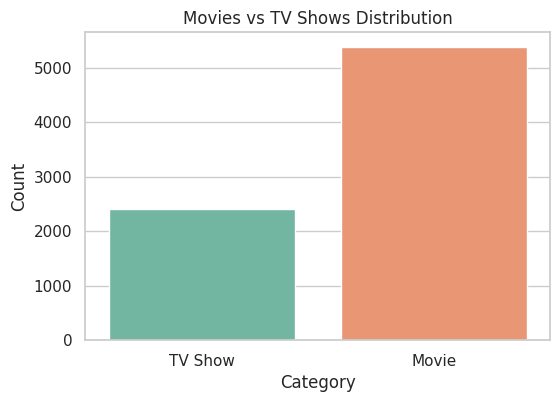

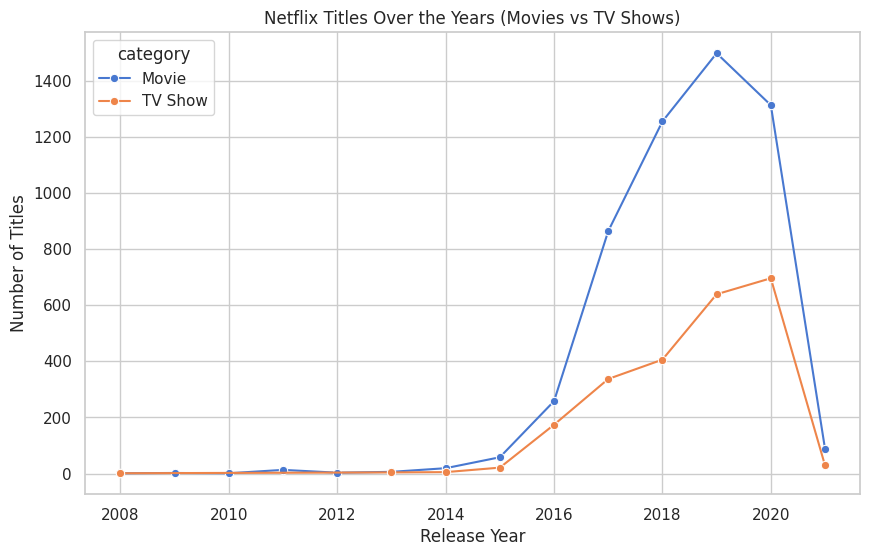

In [30]:


plt.figure(figsize=(6,4))
sns.countplot(data=df, x='category', palette='Set2')
plt.title("Movies vs TV Shows Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

type_year = df.groupby(['release_year','category']).size().reset_index(name='count')

plt.figure(figsize=(10,6))
sns.lineplot(data=type_year, x='release_year', y='count', hue='category', marker='o')
plt.title("Netflix Titles Over the Years (Movies vs TV Shows)")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()


/tmp/ipython-input-4080345916.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




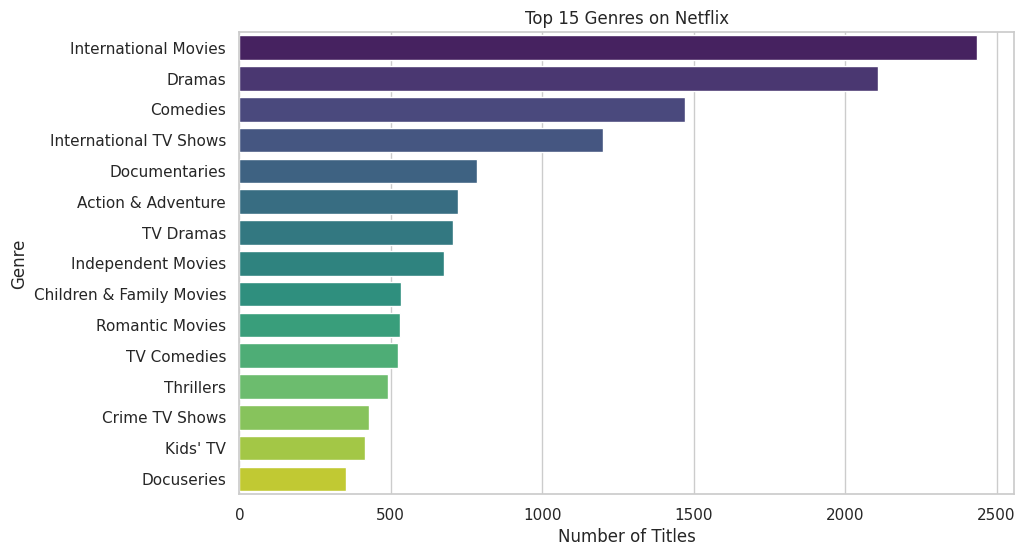

In [31]:

df_genres = df.explode('genres')
genre_counts = df_genres['genres'].value_counts().head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title("Top 15 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()


/tmp/ipython-input-2143024925.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




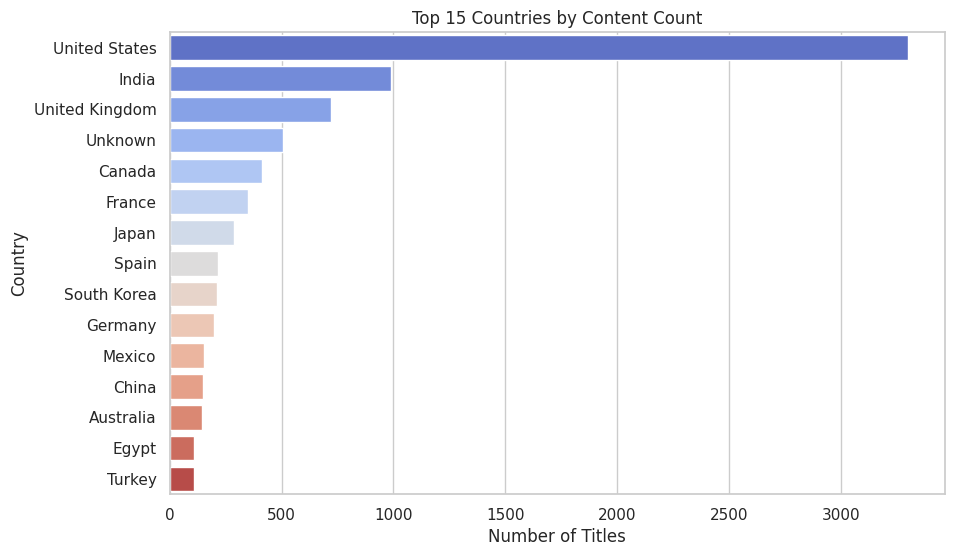

In [32]:

df_countries = df.explode('countries')
country_counts = df_countries['countries'].value_counts().head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='coolwarm')
plt.title("Top 15 Countries by Content Count")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


/tmp/ipython-input-24367283.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




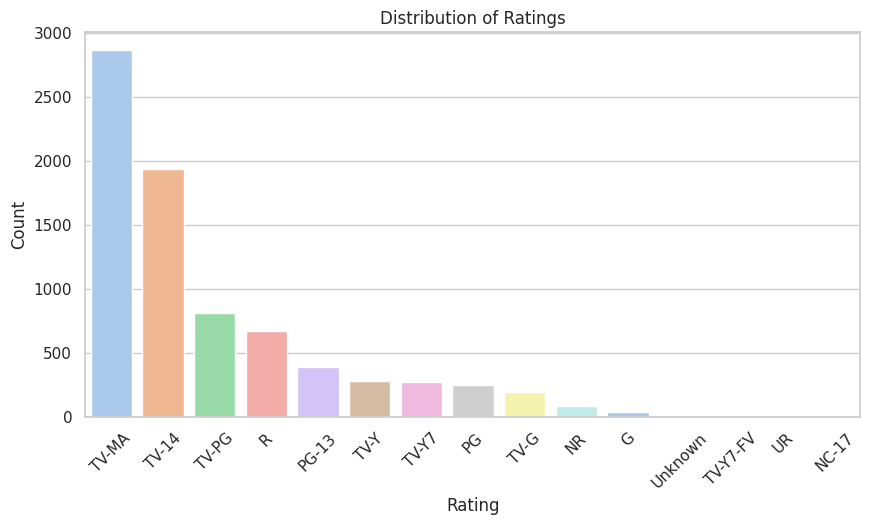

In [33]:

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='pastel')
plt.title("Distribution of Ratings")
plt.xticks(rotation=45)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


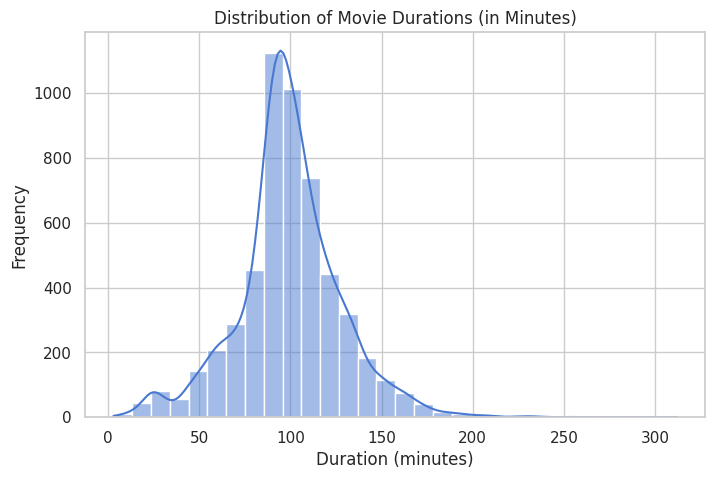

In [34]:

movies = df[df['category'] == 'Movie'].dropna(subset=['duration_mins'])

plt.figure(figsize=(8,5))
sns.histplot(movies['duration_mins'], bins=30, kde=True)
plt.title("Distribution of Movie Durations (in Minutes)")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.show()


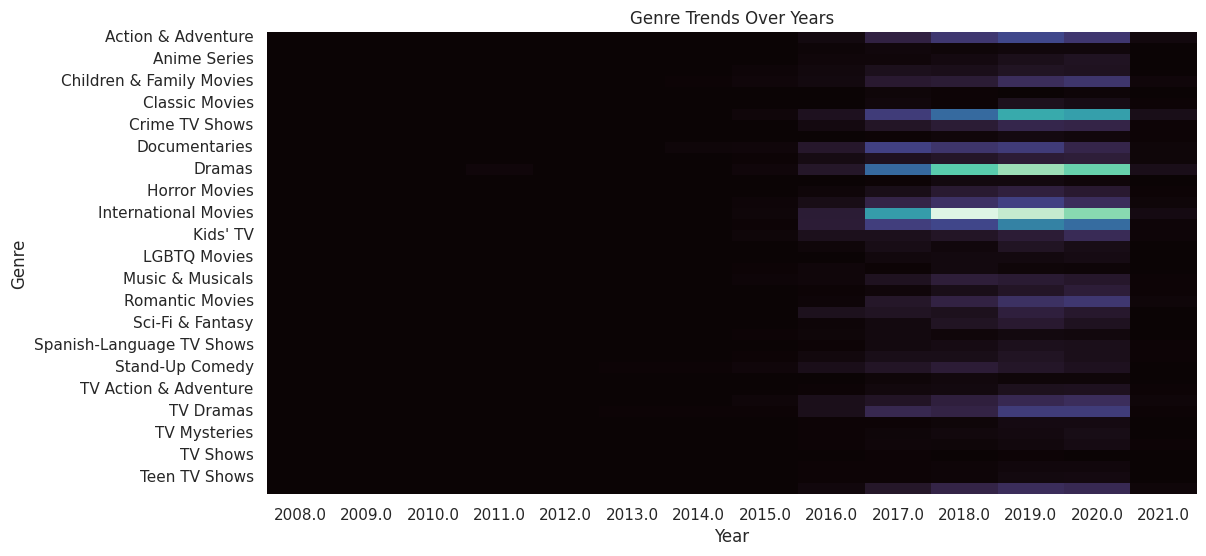

In [35]:

genre_year = df_genres.groupby(['release_year','genres']).size().unstack(fill_value=0)

plt.figure(figsize=(12,6))
sns.heatmap(genre_year.T, cmap='mako', cbar=False)
plt.title("Genre Trends Over Years")
plt.xlabel("Year")
plt.ylabel("Genre")
plt.show()


In [36]:

fig = px.histogram(df, x="release_year", color="category", barmode="group",
                   title="Netflix Titles Added Over the Years (Interactive)")
fig.show()
